

## 第0章：線形代数 基礎演習（NumPy編）
このノートブックでは、統計的機械学習で頻出する線形代数の基本操作を、NumPyを使って実際に動かしながら学習します。

# 0. 準備：NumPyのインポート
まずはNumPyをインポートします。

In [2]:
import numpy as np

# 表示の精度を調整（見やすくするため）# 表示の精度を調整（見やすくするため）
np.set_printoptions(precision=3, suppress=True)

1. ベクトルの定義と転置 (Transpose)数学ではベクトルは通常「列ベクトル（縦向き）」として扱われます。$$\mathbf{x} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \quad \mathbf{x}^T = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}$$

In [3]:
# ベクトルの定義
x = np.array([1, 2, 3])
print(f"Vector x:\n{x}")
print(f"Shape of x: {x.shape}")

# 転置（1次元配列の場合、見た目は変わりませんが計算上は重要です）
print(f"Transposed x:\n{x.T}")

Vector x:
[1 2 3]
Shape of x: (3,)
Transposed x:
[1 2 3]


2. 内積 (Inner Product)2つのデータの「重なり」を計算します。機械学習では「重み $\mathbf{w}$ とデータ $\mathbf{x}$ の計算」で最も使われます。$$\langle \mathbf{x}, \mathbf{y} \rangle = \mathbf{x}^T \mathbf{y} = \sum_{i=1}^n x_i y_i$$

In [4]:
w = np.array([0.5, 0.2, 0.1])
x = np.array([10, 20, 30])

# 内積の計算（Python 3.5以降は @ 演算子が推奨）
inner_product = w @ x

print(f"Weight w: {w}")
print(f"Data x:   {x}")
print(f"Inner Product (w @ x): {inner_product}") # 0.5*10 + 0.2*20 + 0.1*30 = 12.0

Weight w: [0.5 0.2 0.1]
Data x:   [10 20 30]
Inner Product (w @ x): 12.0


## 3. ノルム (Norm)
データの「大きさ」を測ります。主に誤差の評価や正則化に使われます。
$$\|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$$

In [5]:
x = np.array([3, 4]) # 3:4:5 の直角三角形をイメージ

# L2ノルムの計算
norm_x = np.linalg.norm(x)

print(f"Vector x: {x}")
print(f"L2 Norm of x: {norm_x}") # sqrt(3^2 + 4^2) = 5.0

Vector x: [3 4]
L2 Norm of x: 5.0


## 図の解説
実行すると、左右に2つのグラフが表示されます。  
1. 青い太線（左）と緑の太線（右）:
- これが **「原点からの距離（ノルム）がちょうど 1 になる点」** の集合です。
- **L2（左）** は、コンパスで描いたような綺麗な「円」です。
- **L1（右）** は、カクカクした「ひし形」になります。（タクシーが碁盤の目を移動する距離と同じなので「タクシー距離」とも呼ばれます）
2. 赤い矢印（ベクトル $\mathbf{x}=(1, 1)$）:
- 同じベクトルでも、測り方（ノルムの種類）によって「長さ」の値が変わることを示しています。
- L2ノルムだと $\sqrt{1^2+1^2} \approx 1.41$
- L1ノルムだと $|1| + |1| = 2.00$
- L1の世界では、斜め移動は「縦＋横」と評価されるので、L2よりも値が大きくなりやすいことが視覚的にわかります。

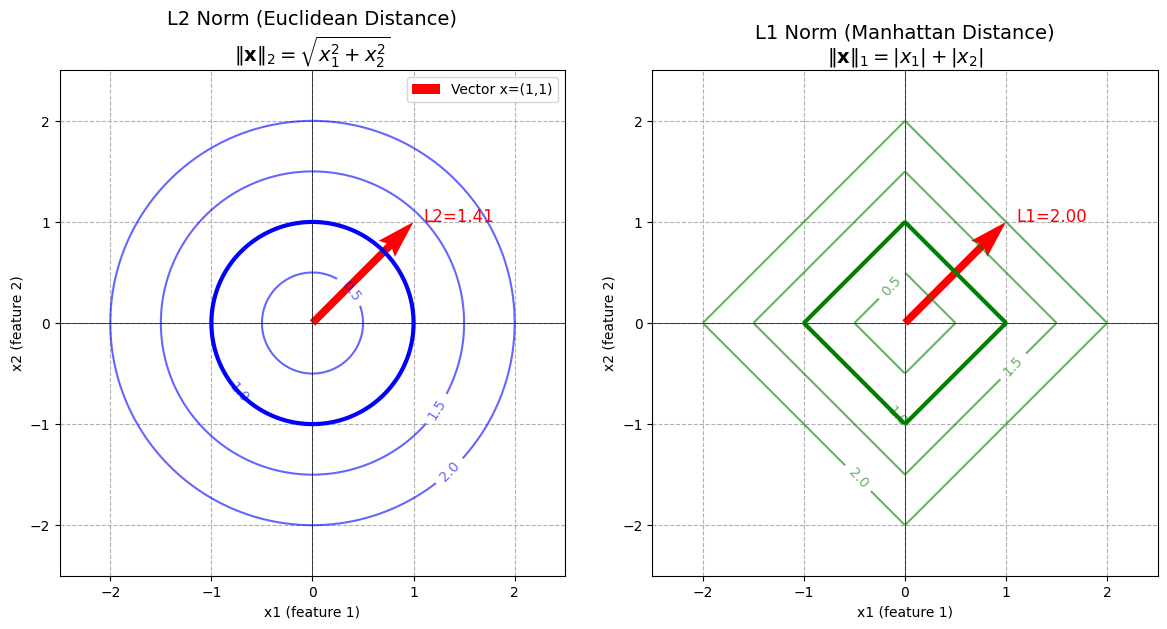

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- データの準備 ---
# -2から2までの範囲をグリッド状に区切る
x = np.linspace(-2.5, 2.5, 400)
y = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x, y)

# --- ノルムの計算 ---
# L2ノルム（通常の距離：円形）
Z_l2 = np.sqrt(X**2 + Y**2)

# L1ノルム（マンハッタン距離：ひし形）
Z_l1 = np.abs(X) + np.abs(Y)

# --- プロットの設定 ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 共通の描画設定関数
def setup_plot(ax, title):
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('x1 (feature 1)')
    ax.set_ylabel('x2 (feature 2)')
    ax.axhline(0, color='black', linewidth=0.5) # x軸
    ax.axvline(0, color='black', linewidth=0.5) # y軸
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.grid(True, linestyle='--')
    ax.set_aspect('equal') # 縦横比を揃える（重要！）

# === 左側：L2ノルムのプロット ===
setup_plot(axes[0], "L2 Norm (Euclidean Distance)\n$\|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2}$")

# 等高線を描く (ノルムが 0.5, 1.0, 1.5, 2.0 の場所)
levels = [0.5, 1.0, 1.5, 2.0]
contours_l2 = axes[0].contour(X, Y, Z_l2, levels=levels, colors='blue', alpha=0.6)
axes[0].clabel(contours_l2, inline=True, fontsize=10)

# 「ノルムが1」の場所を強調（単位円）
axes[0].contour(X, Y, Z_l2, levels=[1.0], colors='blue', linewidths=3)

# サンプルベクトル（例: (1, 1)）とそのL2ノルムを表示
vec = np.array([1, 1])
axes[0].quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.015, label='Vector x=(1,1)')
axes[0].text(vec[0]+0.1, vec[1], f'L2={np.linalg.norm(vec):.2f}', color='red', fontsize=12)
axes[0].legend()


# === 右側：L1ノルムのプロット ===
setup_plot(axes[1], "L1 Norm (Manhattan Distance)\n$\|\mathbf{x}\|_1 = |x_1| + |x_2|$")

# 等高線を描く
contours_l1 = axes[1].contour(X, Y, Z_l1, levels=levels, colors='green', alpha=0.6)
axes[1].clabel(contours_l1, inline=True, fontsize=10)

# 「ノルムが1」の場所を強調（単位ひし形）
axes[1].contour(X, Y, Z_l1, levels=[1.0], colors='green', linewidths=3)

# 同じサンプルベクトル(1, 1)のL1ノルムを表示
axes[1].quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.015)
axes[1].text(vec[0]+0.1, vec[1], f'L1={np.sum(np.abs(vec)):.2f}', color='red', fontsize=12)

plt.tight_layout()
plt.show()